In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from sklearn.manifold import TSNE

In [3]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head(n=4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [4]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
data.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
data.head(n=4)
# remove noise from n_tokens_content. those equals to 0
data  = data[data[' n_tokens_content'] != 0]
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
data = data[data[' n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words. It doesn't contain relaible information.
data.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)

original_data = copy(data)

In [5]:
# describing the data
data.describe()
# from the data, there will be need to normailze the data if their will be need for condersing any machine learning model.

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,...,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000
mean,10.382455,563.269201,0.546837,0.693455,11.217877,3.394597,4.561853,1.263819,4.687892,7.215017,...,0.098379,0.779983,-0.267500,-0.537984,-0.110804,0.280581,0.070999,0.342440,0.154934,3355.294238
std,2.113816,468.277491,0.102314,0.100644,11.340728,3.869676,8.292093,4.164945,0.283234,1.916484,...,0.070381,0.212474,0.121168,0.279693,0.094918,0.323562,0.264341,0.188600,0.225637,11586.112129
min,2.000000,18.000000,0.114964,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,0.632588,5.000000,1.000000,1.000000,0.000000,4.496245,6.000000,...,0.050000,0.600000,-0.331540,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542982,0.693727,8.000000,3.000000,1.000000,0.000000,4.674120,7.000000,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,0.756944,14.000000,4.000000,4.000000,1.000000,4.861903,9.000000,...,0.100000,1.000000,-0.193423,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
share_data = np.sort(data[' shares'].values)
print(share_data.shape)
leng = share_data.shape[0]

middle = share_data[int(leng*0.7)-1]
middle

(38462,)


2300

In [8]:
# ver good shares
'''
share_data = np.sort(data[' shares'].values)

leng = share_data.shape[0]

top_70 = share_data[int(leng*0.80)-1]
print (top_70)
top_50 = share_data[int(leng*0.40)-1]
print (top_50)
#temp_data = data[(data[' shares'] >= top_70)]
temp_data = data[(data[' shares'] >= top_50) & (data[' shares'] < top_70)]

print(temp_data.shape)

'''

"\nshare_data = np.sort(data[' shares'].values)\n\nleng = share_data.shape[0]\n\ntop_70 = share_data[int(leng*0.80)-1]\nprint (top_70)\ntop_50 = share_data[int(leng*0.40)-1]\nprint (top_50)\n#temp_data = data[(data[' shares'] >= top_70)]\ntemp_data = data[(data[' shares'] >= top_50) & (data[' shares'] < top_70)]\n\nprint(temp_data.shape)\n\n"

In [9]:
# create label grades for the classes
'''
Very good = 7746 # top 80%
Good = 7785 # top 60 - top 80
Average = 8585 # 40% - 60%
Poor = 14346 # less than 40%
'''
share_label = list()
for share in data[' shares']:
    if share <= 1400:
        share_label.append('Unpopular')
    else:
        share_label.append('Popular')

# Update this class label into the dataframe
data = pd.concat([data.reset_index(drop=True), pd.DataFrame(share_label, columns=['popularity'])], axis=1)
data.head(4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12,219,0.663594,0.815385,4,2,1,0,4.680365,5,...,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593,Unpopular
1,9,255,0.604743,0.791946,3,1,1,0,4.913725,4,...,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711,Unpopular
2,9,211,0.575130,0.663866,3,1,1,0,4.393365,6,...,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500,Popular
3,9,531,0.503788,0.665635,9,0,1,0,4.404896,7,...,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200,Unpopular


,popularity,No of articles
0,Popular,18911
1,Unpopular,19551


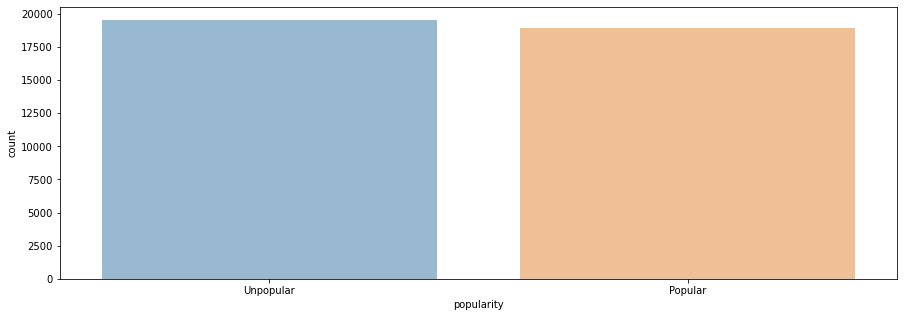

In [10]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)

data_channel_data = data.groupby('popularity').size().reset_index()
data_channel_data.columns = ['popularity','No of articles']
data_channel_data

Skewness: 34.952465
Kurtosis: 1909.931080


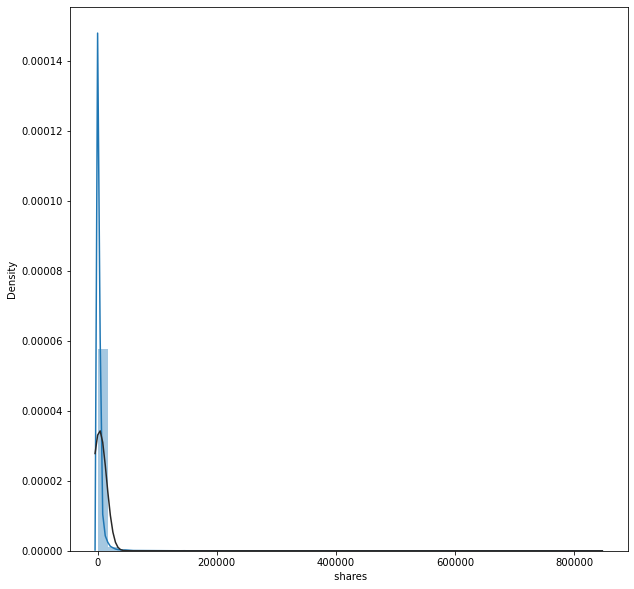

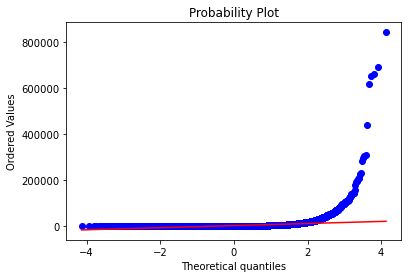

In [11]:
print("Skewness: %f" % data[' shares'].skew())
print("Kurtosis: %f" % data[' shares'].kurt())

from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data[' shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data[' shares'], fit=norm);
fig = plt.figure()
res = probplot(data[' shares'], plot=plt)

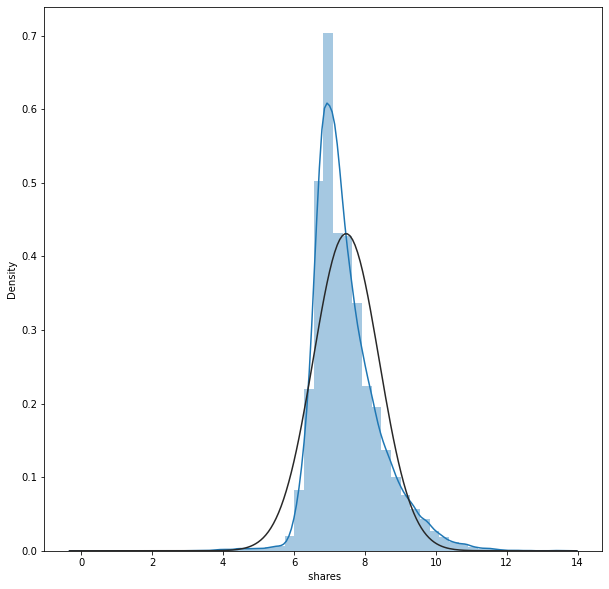

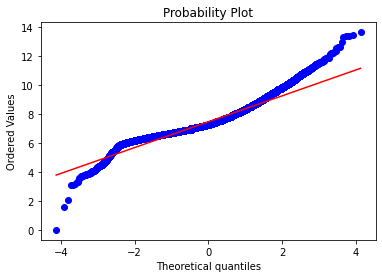

In [12]:
#applying log transformation
new_shares_data = copy(data)

new_shares_data.loc[new_shares_data[' shares'] > 0, ' shares'] = np.log(data.loc[data[' shares'] > 0, ' shares'])
new_shares_log = new_shares_data[' shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

In [13]:
# use log transformation to transform each features to a normal distribution

# note log transformation can only be performed on data without zero value
for col in data.iloc[:,:-1].columns:
    #applying log transformation
    temp = data[data[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        data[col] = np.log(data[col])
        print (col)

 n_tokens_title
 n_tokens_content
 n_unique_tokens
 n_non_stop_unique_tokens
 average_token_length
 num_keywords
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04
 shares


In [14]:
# Evaluating the impact of log transformation

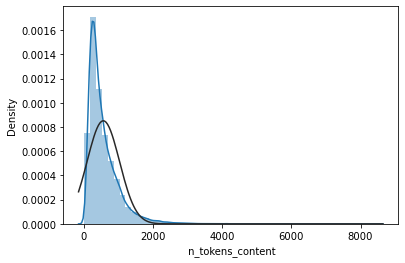

In [15]:
# before log transformation
sns.distplot(original_data[' n_tokens_content'], fit=norm);

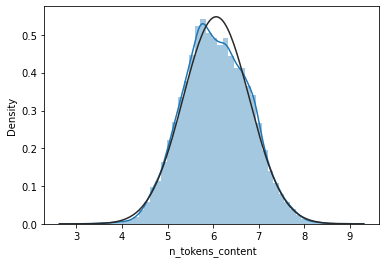

In [16]:
# after log transformation
sns.distplot(data[' n_tokens_content'], fit=norm);

In [17]:
# scale the data
# StandardScaler cannot guarantee balanced feature scales in the presence of outliers.
# StandardScaler removes the mean and scales the data to unit variance.
# However, the outliers have an influence when
# computing the empirical mean and standard deviation which shrink the range of the feature values 

# source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

# Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# scalled all the feature selections aside shares and populairty
scalled_data = scaler.fit_transform(data.iloc[:, :-2])

# update the dataframe back with the scalled data
data.iloc[:, :-2] = scalled_data

In [18]:
# the data after log transformation and robust scaler
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38462.000000,38462.000000,3.846200e+04,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,...,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000
mean,0.055385,0.019730,-4.537476e-02,-0.067014,0.357542,0.131532,1.187284,1.263819,0.014624,-0.024494,...,-0.032425,-0.050042,-0.070677,-0.094538,-0.144052,0.311161,0.520656,-0.472679,0.619734,7.469257
std,0.734376,0.703262,7.892188e-01,0.881549,1.260081,1.289892,2.764031,4.164945,0.764959,0.730880,...,1.407629,0.531186,0.877286,0.696125,1.265577,0.647124,1.938503,0.565801,0.902550,0.925474
min,-5.594502,-3.050697,-6.288232e+00,-9.816826,-0.888889,-1.000000,-0.333333,0.000000,-3.339512,-4.799205,...,-2.000000,-2.000000,-5.374154,-1.244444,-12.000000,-0.250000,-7.333333,-1.500000,0.000000,0.000000
25%,-0.366239,-0.474026,-5.212187e-01,-0.514063,-0.333333,-0.666667,0.000000,0.000000,-0.496223,-0.380182,...,-1.000000,-0.500000,-0.534343,-0.533333,-0.333333,-0.250000,0.000000,-1.000000,0.000000,6.851185
50%,0.000000,0.000000,-2.248466e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.244228
75%,0.633761,0.525974,4.787813e-01,0.485937,0.666667,0.333333,1.000000,1.000000,0.503777,0.619818,...,0.000000,0.500000,0.465657,0.466667,0.666667,0.750000,1.000000,0.000000,1.000000,7.901007
max,2.895242,2.896457,2.473554e+00,2.037529,32.888889,37.666667,42.333333,91.000000,6.939483,0.879669,...,18.000000,0.500000,1.866086,1.244444,1.333333,1.750000,7.333333,0.000000,4.000000,13.645078


In [19]:
data.iloc[:,:-2]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.000000,0.0,0.017077,-0.829843,...,0.165213,0.000000,-0.250,-0.667998,-0.248889,-1.333333,0.750000,-1.375000,-1.500000,0.750000
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.000000,0.0,0.639381,-1.380182,...,-0.739546,-1.333333,-0.250,1.006307,0.933333,0.000000,-0.250000,0.000000,0.000000,0.000000
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.000000,0.0,-0.792272,-0.380182,...,1.321263,0.000000,0.500,-1.512693,-0.746667,-0.444444,-0.250000,0.000000,0.000000,0.000000
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.000000,0.0,-0.758746,0.000000,...,0.237505,0.727273,0.000,-0.810609,-0.248889,-0.888889,-0.250000,0.000000,0.000000,0.000000
4,0.911994,0.898597,-1.082464,-1.386651,1.222222,5.333333,6.333333,0.0,0.023826,0.000000,...,0.485710,-1.333333,0.500,0.271841,0.000000,0.666667,0.659091,1.000000,-1.363636,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,0.331304,-0.194168,-0.105268,-0.072307,0.111111,1.333333,0.000000,1.0,-0.420000,0.329329,...,-0.277147,0.000000,-0.125,-0.016377,0.000000,-0.333333,-0.050000,0.000000,-0.300000,0.000000
38458,0.633761,-0.245794,1.007356,1.357180,0.111111,1.333333,0.666667,48.0,-0.757029,0.000000,...,0.127619,0.727273,-0.250,0.337591,0.248889,0.000000,0.350000,7.333333,-0.900000,4.000000
38459,0.000000,0.042458,-0.203662,-0.413331,1.777778,-0.666667,3.666667,1.0,1.057262,0.329329,...,-0.538730,0.727273,-0.750,-0.714621,-0.746667,-0.888889,0.659091,1.000000,-1.363636,0.545455
38460,-1.775660,0.461574,-0.026106,-0.008572,0.222222,-0.666667,0.000000,0.0,0.798073,-0.829843,...,-1.233385,-0.750000,-0.750,0.380059,0.000000,1.166667,-0.250000,0.000000,0.000000,0.000000


In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [21]:
# Kmeans perform poorly on high feature space
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.iloc[:,:-2])
reduced_data.shape

(38462, 2)

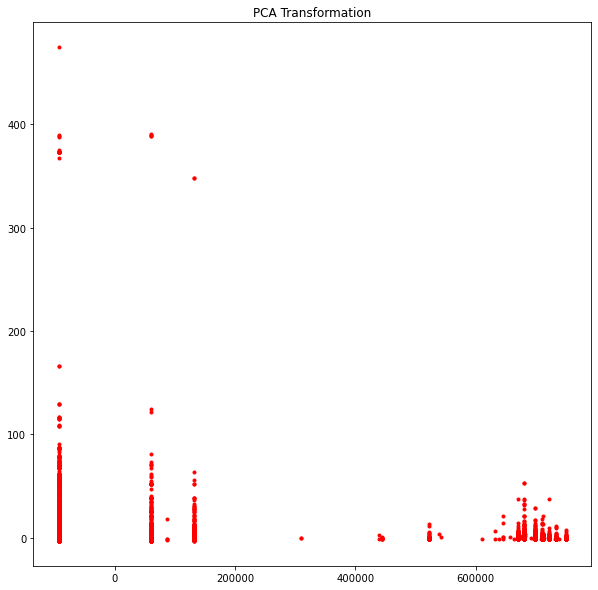

In [22]:
# plotting the clusters PCA
plt.figure(figsize=(10,10))
plt.plot(reduced_data[:,0], reduced_data[:,1], 'r.')
plt.title('PCA Transformation')

plt.show()

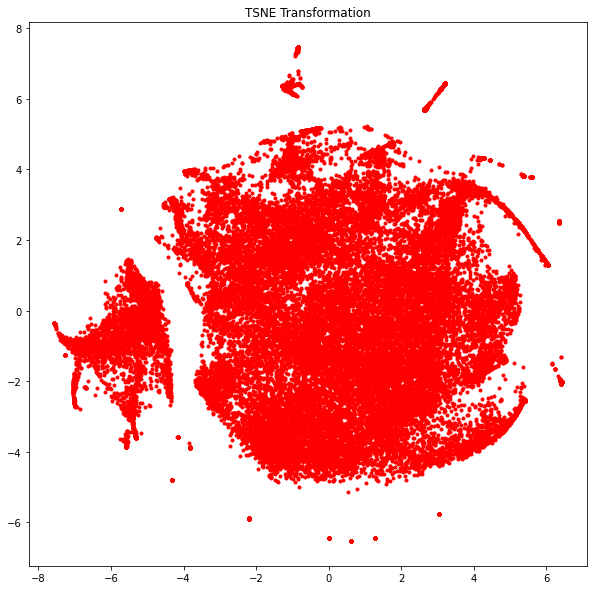

In [23]:
tsne = TSNE(n_components=2, n_iter=300)
reduced_tsne = tsne.fit_transform(data.iloc[:,:-2])

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'r.')
plt.title('TSNE Transformation')
plt.show()

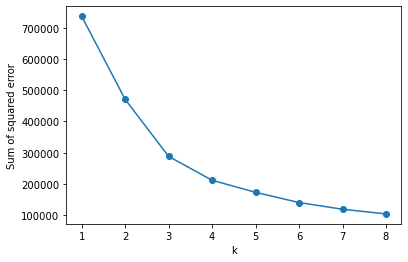

In [24]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(reduced_tsne)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

In [25]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

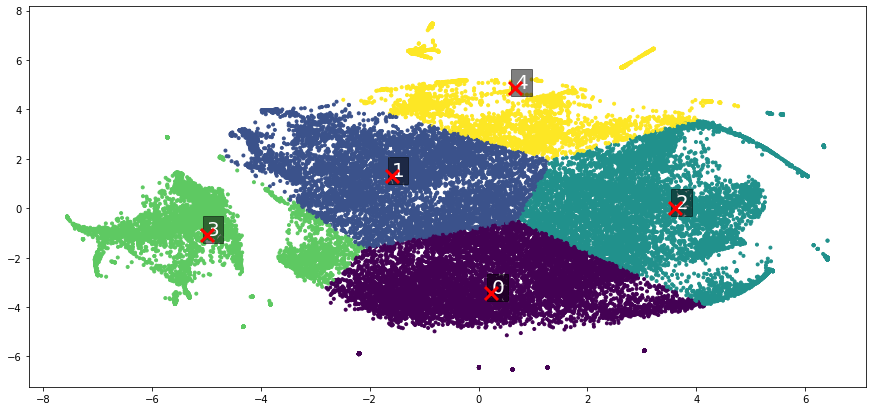

In [26]:
centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(15,7))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

# ploting the cluster numbers
for i in range(clusters.shape[0]):
    plt.text(centroids[i, 0], centroids[i, 1], clusters[i], fontsize=20, color='white', 
             bbox=dict(facecolor='black', alpha=0.5))
    
plt.scatter(reduced_tsne[:,0],reduced_tsne[:,1],c=kmeans_preds,marker='.')
plt.show()

In [27]:
# fussing the cluster data into the dataframe
data1=pd.concat([data.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['clusters'])],axis=1)

In [28]:
data1.shape

(38462, 60)

In [29]:
# extrating individual cluster from the data
cluster1_data = data1[data1['clusters'] == 0]
cluster2_data = data1[data1['clusters'] == 1]
cluster3_data = data1[data1['clusters'] == 2]
cluster4_data = data1[data1['clusters'] == 3]
cluster5_data = data1[data1['clusters'] == 4]
print ('Cluster1 size: ',cluster1_data.shape)
print ('Cluster2 size: ',cluster2_data.shape)
print ('Cluster3 size: ',cluster3_data.shape)
print ('Cluster4 size: ',cluster4_data.shape)
print ('Cluster5 size: ',cluster5_data.shape)

Cluster1 size:  (9739, 60)
Cluster2 size:  (7657, 60)
Cluster3 size:  (9212, 60)
Cluster4 size:  (5444, 60)
Cluster5 size:  (6410, 60)


In [30]:
# Mutual Information computation
# our label is the popularity and will be disregarding the shares data
from sklearn.feature_selection import mutual_info_classif

# Mutual information for cluster 1
X1 = cluster1_data.iloc[:, :-3]
y1 = cluster1_data.iloc[:, -2]
mi_data_clus1 = mutual_info_classif(X1, y1, 'auto')

In [31]:
# mututal information for cluster 2
X2 = cluster2_data.iloc[:, :-3]
y2 = cluster2_data.iloc[:, -2]
mi_data_clus2 = mutual_info_classif(X2, y2, 'auto')

In [32]:
# mututal information for cluster 3
X3 = cluster3_data.iloc[:, :-3]
y3 = cluster3_data.iloc[:, -2]
mi_data_clus3 = mutual_info_classif(X3, y3, 'auto')
# mututal information for cluster 3
X4 = cluster4_data.iloc[:, :-3]
y4 = cluster4_data.iloc[:, -2]
mi_data_clus4 = mutual_info_classif(X4, y4, 'auto')
# mututal information for cluster 3
X5 = cluster5_data.iloc[:, :-3]
y5 = cluster5_data.iloc[:, -2]
mi_data_clus5 = mutual_info_classif(X5, y5, 'auto')

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 1')

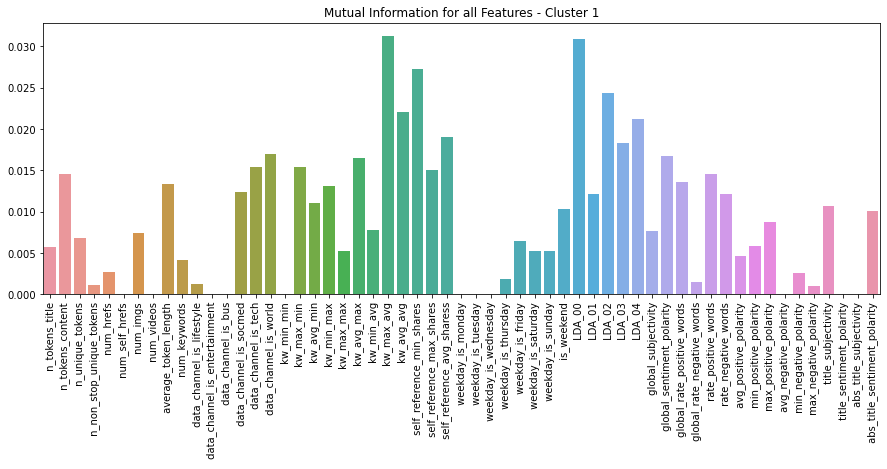

In [33]:
# ploting the result of mutual information
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X1.columns,y=mi_data_clus1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 1")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 2')

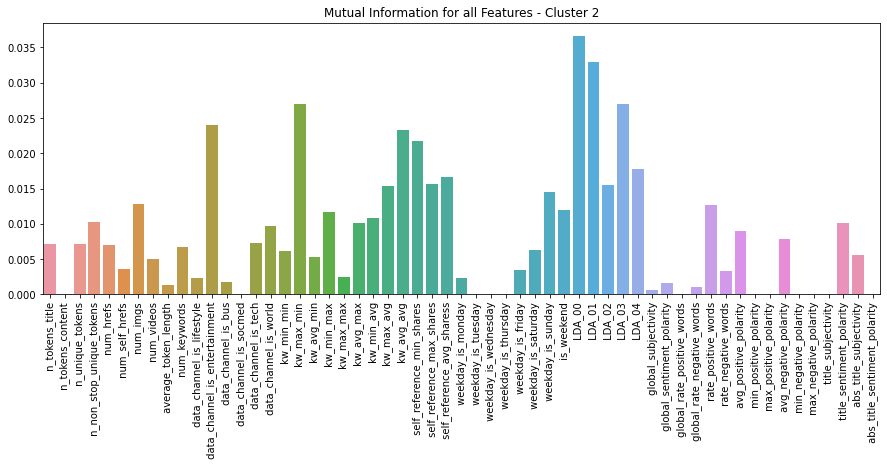

In [34]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X2.columns,y=mi_data_clus2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 2")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 3')

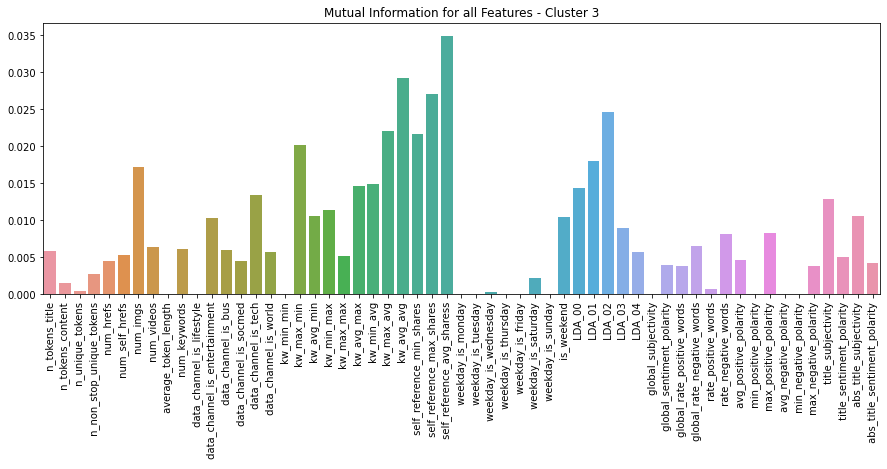

In [35]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X3.columns,y=mi_data_clus3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 3")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 4')

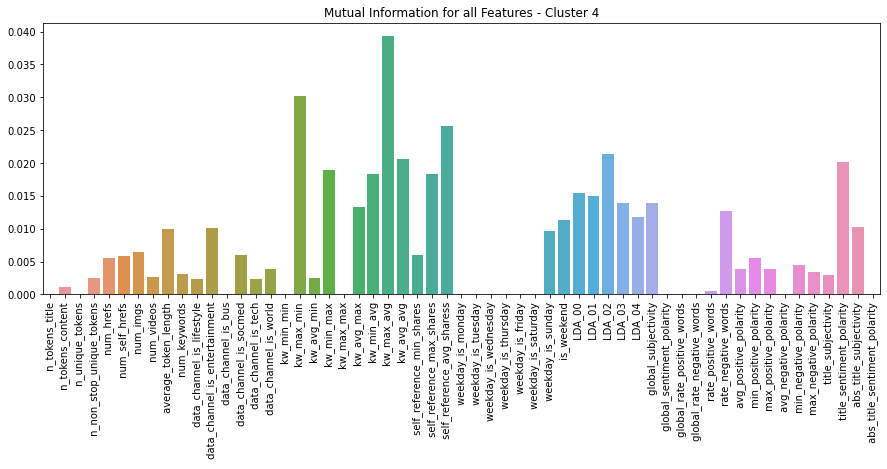

In [36]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=mi_data_clus4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 4")

Text(0.5, 1.0, 'Mutual Information for all Features - Cluster 5')

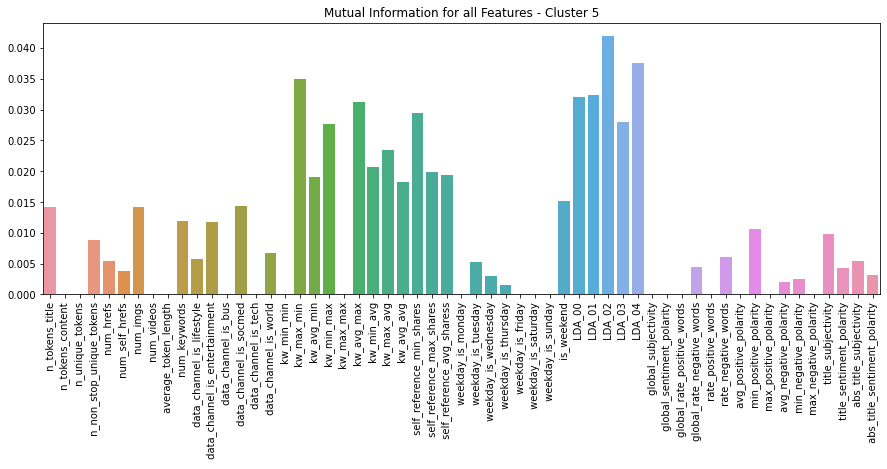

In [37]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X5.columns,y=mi_data_clus5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Mutual Information for all Features - Cluster 5")

In [38]:
### an helper function for extracting the best features possible
def extract_best_features(feature_scores, feature_col, n=5, sort_metric=False):
    # this function extracts out the best features.
    # inputs 
    temp = np.hstack((feature_scores.reshape(-1,1), feature_col.reshape(-1,1)))
    features = pd.DataFrame(temp, columns=['score', 'name'])
    # sort the features
    features = features.sort_values(by=['score'], ascending=sort_metric).reset_index(drop=True)
    # extract the best features
    best_features = features.iloc[:n, :].to_numpy()
    return best_features

In [39]:
best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=10)
best_features

array([[0.0393917549911893, ' kw_max_avg'],
       [0.030252384283242062, ' kw_max_min'],
       [0.02565265254675375, ' self_reference_avg_sharess'],
       [0.021433012109428606, ' LDA_02'],
       [0.02058705945330086, ' kw_avg_avg'],
       [0.02009799814791191, ' title_sentiment_polarity'],
       [0.018932285600608, ' kw_min_max'],
       [0.018387152981091948, ' self_reference_max_shares'],
       [0.018261088115551827, ' kw_min_avg'],
       [0.015361107084636894, ' LDA_00']], dtype=object)

In [40]:
from sklearn.feature_selection import f_classif

Text(0.5, 1.0, 'F score for all Features - Cluster 1')

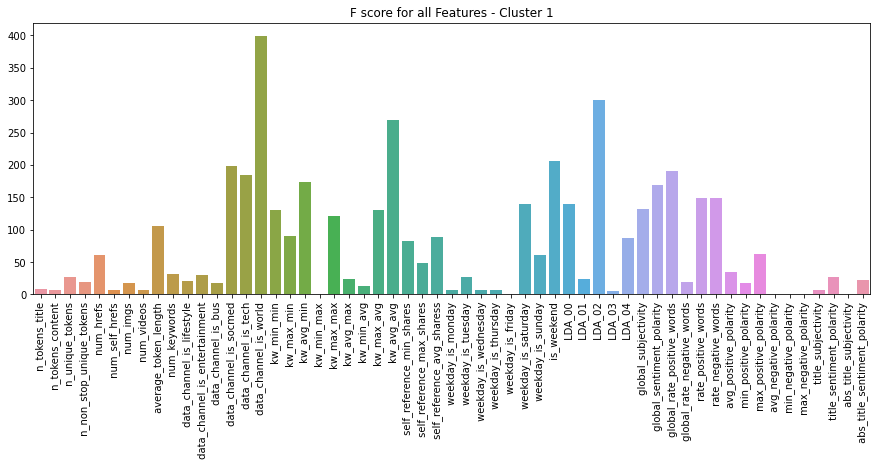

In [41]:
# F-Score for cluster 1

f_test_data = f_classif(X1, y1)
f_score_1=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X1.columns,y=f_score_1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 1")

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,


Text(0.5, 1.0, 'F score for all Features - Cluster 2')

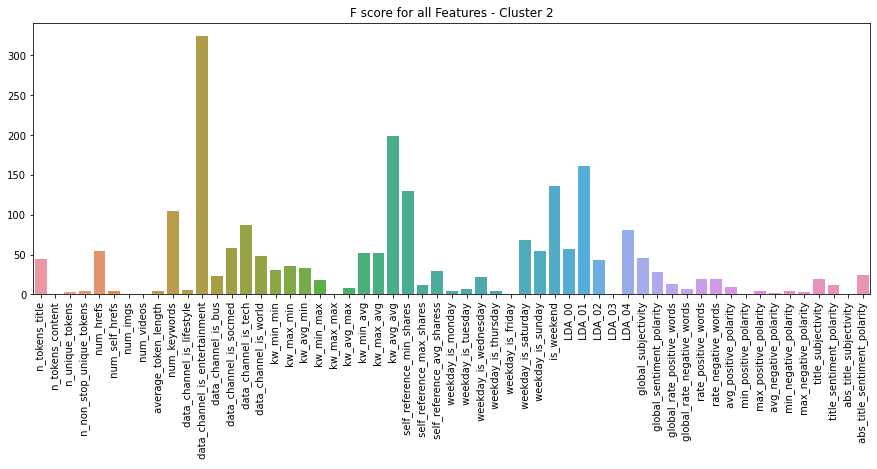

In [42]:
# F-Score for cluster 2
f_test_data = f_classif(X2, y2)
f_score_2=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X2.columns,y=f_score_2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 2")

Text(0.5, 1.0, 'F score for all Features - Cluster 3')

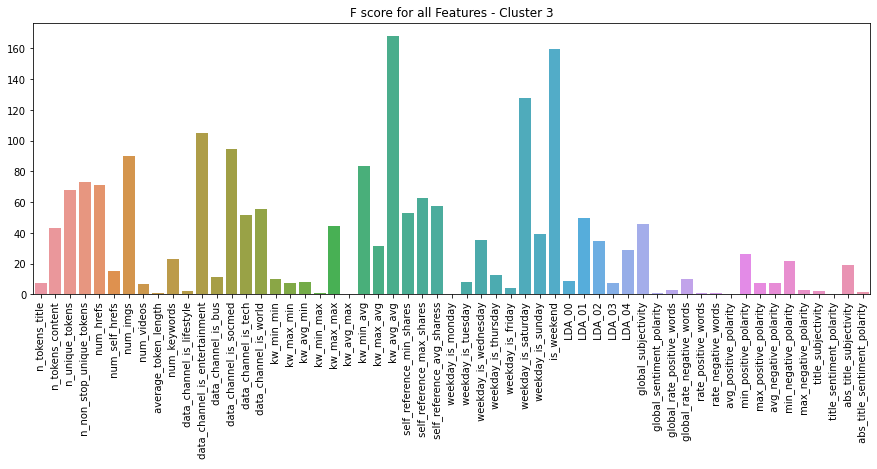

In [43]:
# F-Score for cluster 3
f_test_data = f_classif(X3, y3)
f_score_3=f_test_data[0]

plt.figure(figsize=(15, 5))
g = sns.barplot(x=X3.columns,y=f_score_3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 3")

In [44]:
# F-Score for cluster 4
f_test_data = f_classif(X4, y4)
f_score_4=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X5, y5)
f_score_5=f_test_data[0]

Text(0.5, 1.0, 'F score for all Features - Cluster 4')

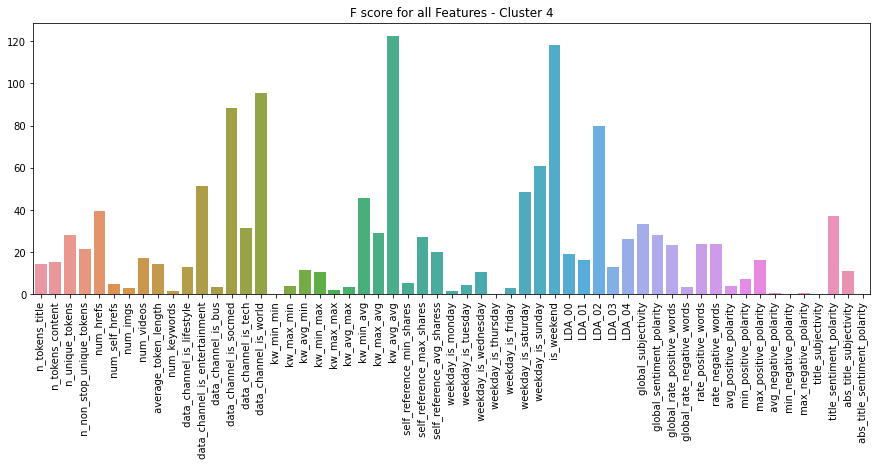

In [45]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=f_score_4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 4")

Text(0.5, 1.0, 'F score for all Features - Cluster 5')

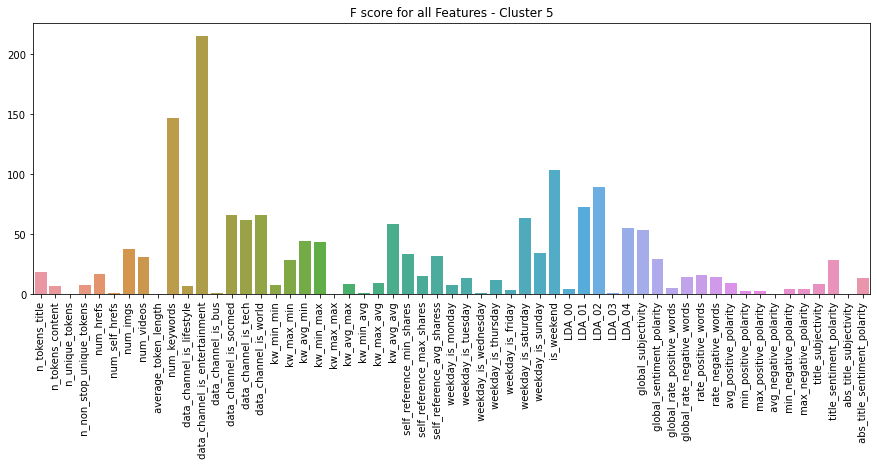

In [46]:
plt.figure(figsize=(15, 5))
g = sns.barplot(x=X4.columns,y=f_score_5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("F score for all Features - Cluster 5")

In [47]:
best_features = extract_best_features(f_score_1, X1.columns.values, n=10)
best_features

array([[399.6683175132725, ' data_channel_is_world'],
       [300.49554268899465, ' LDA_02'],
       [269.213115660075, ' kw_avg_avg'],
       [206.02462746386524, ' is_weekend'],
       [198.94966662673946, ' data_channel_is_socmed'],
       [189.80159949540567, ' global_rate_positive_words'],
       [183.91756042588463, ' data_channel_is_tech'],
       [172.9593292933863, ' kw_avg_min'],
       [168.40163242631445, ' global_sentiment_polarity'],
       [148.86018584124938, ' rate_negative_words']], dtype=object)

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Random forest is used as the model for RFE
# RFE for Cluster 1
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 5 features
rfe = RFE(model, 5) 
rfe = rfe.fit(X1, y1)
rfe_5_features_clus1 = X1.columns.values[rfe.get_support()]
# for 10 features
rfe = RFE(model, 10) 
rfe = rfe.fit(X1, y1)
rfe_10_features_clus1 = X1.columns.values[rfe.get_support()]
# for 20 features
rfe = RFE(model, 20) 
rfe = rfe.fit(X1, y1)
rfe_20_features_clus1  = X1.columns.values[rfe.get_support()]
# for 30 features
rfe = RFE(model, 30) 
rfe = rfe.fit(X1, y1)
rfe_30_features_clus1 = X1.columns.values[rfe.get_support()]

In [50]:
# Random forest is used as the model for RFE
# RFE for Cluster 2
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 5 features
rfe = RFE(model, 5) 
rfe = rfe.fit(X2, y2)
rfe_5_features_clus2 = X2.columns.values[rfe.get_support()]
# for 10 features
rfe = RFE(model, 10) 
rfe = rfe.fit(X2, y2)
rfe_10_features_clus2 = X2.columns.values[rfe.get_support()]
# for 20 features
rfe = RFE(model, 20) 
rfe = rfe.fit(X2, y2)
rfe_20_features_clus2  = X2.columns.values[rfe.get_support()]
# for 30 features
rfe = RFE(model, 30) 
rfe = rfe.fit(X2, y2)
rfe_30_features_clus2 = X2.columns.values[rfe.get_support()]

In [51]:
# Random forest is used as the model for RFE
# RFE for Cluster 3
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 5 features
rfe = RFE(model, 5) 
rfe = rfe.fit(X3, y3)
rfe_5_features_clus3 = X3.columns.values[rfe.get_support()]
# for 10 features
rfe = RFE(model, 10) 
rfe = rfe.fit(X3, y3)
rfe_10_features_clus3 = X3.columns.values[rfe.get_support()]
# for 20 features
rfe = RFE(model, 20) 
rfe = rfe.fit(X3, y3)
rfe_20_features_clus3  = X3.columns.values[rfe.get_support()]
# for 30 features
rfe = RFE(model, 30) 
rfe = rfe.fit(X3, y3)
rfe_30_features_clus3 = X3.columns.values[rfe.get_support()]

In [52]:
# Random forest is used as the model for RFE
# RFE for Cluster 4
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 5 features
rfe = RFE(model, 5) 
rfe = rfe.fit(X4, y4)
rfe_5_features_clus4 = X4.columns.values[rfe.get_support()]
# for 10 features
rfe = RFE(model, 10) 
rfe = rfe.fit(X4, y4)
rfe_10_features_clus4 = X4.columns.values[rfe.get_support()]
# for 20 features
rfe = RFE(model, 20) 
rfe = rfe.fit(X4, y4)
rfe_20_features_clus4  = X4.columns.values[rfe.get_support()]
# for 30 features
rfe = RFE(model, 30) 
rfe = rfe.fit(X4, y4)
rfe_30_features_clus4 = X4.columns.values[rfe.get_support()]

In [53]:
# Random forest is used as the model for RFE
# RFE for Cluster 5
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10)
# for 5 features
rfe = RFE(model, 5) 
rfe = rfe.fit(X5, y5)
rfe_5_features_clus5 = X5.columns.values[rfe.get_support()]
# for 10 features
rfe = RFE(model, 10) 
rfe = rfe.fit(X5, y5)
rfe_10_features_clus5 = X5.columns.values[rfe.get_support()]
# for 20 features
rfe = RFE(model, 20) 
rfe = rfe.fit(X5, y5)
rfe_20_features_clus5  = X5.columns.values[rfe.get_support()]
# for 30 features
rfe = RFE(model, 30) 
rfe = rfe.fit(X5, y5)
rfe_30_features_clus5 = X5.columns.values[rfe.get_support()]

In [54]:
from sklearn.decomposition import PCA

In [55]:
#########################################################
# PCA for cluster 1
# for 5 features
transformer = PCA(n_components=5)
pca_clus1_5 = transformer.fit_transform(X1)
# for 10 features
transformer = PCA(n_components=10)
pca_clus1_10 = transformer.fit_transform(X1)
# for 20 features
transformer = PCA(n_components=20)
pca_clus1_20 = transformer.fit_transform(X1)
# for 30 features
transformer = PCA(n_components=30)
pca_clus1_30 = transformer.fit_transform(X1)

In [56]:
# PCA for cluster 2
# for 5 features
transformer = PCA(n_components=5)
pca_clus2_5 = transformer.fit_transform(X2)
# for 10 features
transformer = PCA(n_components=10)
pca_clus2_10 = transformer.fit_transform(X2)
# for 20 features
transformer = PCA(n_components=20)
pca_clus2_20 = transformer.fit_transform(X2)
# for 30 features
transformer = PCA(n_components=30)
pca_clus2_30 = transformer.fit_transform(X2)

In [57]:
# PCA for cluster 3
# for 5 features
transformer = PCA(n_components=5)
pca_clus3_5 = transformer.fit_transform(X3)
# for 10 features
transformer = PCA(n_components=10)
pca_clus3_10 = transformer.fit_transform(X3)
# for 20 features
transformer = PCA(n_components=20)
pca_clus3_20 = transformer.fit_transform(X3)
# for 30 features
transformer = PCA(n_components=30)
pca_clus3_30 = transformer.fit_transform(X3)

In [58]:
# PCA for cluster 4
# for 5 features
transformer = PCA(n_components=5)
pca_clus4_5 = transformer.fit_transform(X4)
# for 10 features
transformer = PCA(n_components=10)
pca_clus4_10 = transformer.fit_transform(X4)
# for 20 features
transformer = PCA(n_components=20)
pca_clus4_20 = transformer.fit_transform(X4)
# for 30 features
transformer = PCA(n_components=30)
pca_clus4_30 = transformer.fit_transform(X4)

In [59]:
# PCA for cluster 5
# for 5 features
transformer = PCA(n_components=5)
pca_clus5_5 = transformer.fit_transform(X5)
# for 10 features
transformer = PCA(n_components=10)
pca_clus5_10 = transformer.fit_transform(X5)
# for 20 features
transformer = PCA(n_components=20)
pca_clus5_20 = transformer.fit_transform(X5)
# for 30 features
transformer = PCA(n_components=30)
pca_clus5_30 = transformer.fit_transform(X5)

In [60]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(y1.values)
class_names = labelEn.classes_
class_names

array(['Popular', 'Unpopular'], dtype=object)

In [61]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import recall_score

In [62]:
#### PCA Features

In [63]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

pca_data = [pca_clus1_5, pca_clus1_10, pca_clus1_20, pca_clus1_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 1::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
    
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

pca_data = [pca_clus2_5, pca_clus2_10, pca_clus2_20, pca_clus2_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 2::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

pca_data = [pca_clus3_5, pca_clus3_10, pca_clus3_20, pca_clus3_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
    
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

pca_data = [pca_clus4_5, pca_clus4_10, pca_clus4_20, pca_clus4_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 4::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

pca_data = [pca_clus5_5, pca_clus5_10, pca_clus5_20, pca_clus5_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 5::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

KNN - Cluster 1::PCA - 5 Features
Accuracy - 67.35112936344969%
Recall - 0.6735112936344969
KNN - Cluster 1::PCA - 10 Features
Accuracy - 68.37782340862422%
Recall - 0.6837782340862423
KNN - Cluster 1::PCA - 20 Features
Accuracy - 70.53388090349077%
Recall - 0.7053388090349076
KNN - Cluster 1::PCA - 30 Features
Accuracy - 70.58521560574948%
Recall - 0.7058521560574949
KNN - Cluster 2::PCA - 5 Features
Accuracy - 62.40208877284596%
Recall - 0.6240208877284595
KNN - Cluster 2::PCA - 10 Features
Accuracy - 61.81462140992166%
Recall - 0.6181462140992167
KNN - Cluster 2::PCA - 20 Features
Accuracy - 63.838120104438644%
Recall - 0.6383812010443864
KNN - Cluster 2::PCA - 30 Features
Accuracy - 64.62140992167102%
Recall - 0.6462140992167101
KNN - Cluster 3::PCA - 5 Features
Accuracy - 58.22029300054259%
Recall - 0.5822029300054259
KNN - Cluster 3::PCA - 10 Features
Accuracy - 59.41399891481281%
Recall - 0.594139989148128
KNN - Cluster 3::PCA - 20 Features
Accuracy - 59.359739555073254%
Recall 

In [64]:
#### KNN Cross-Validation

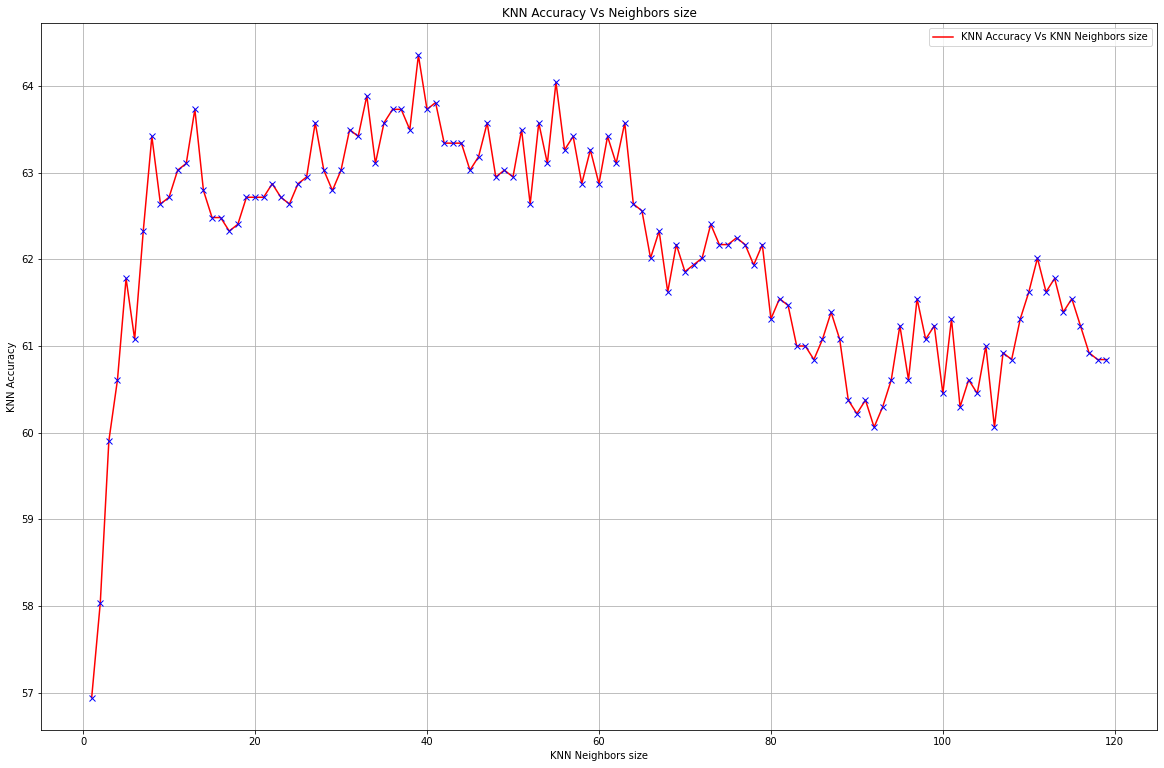

In [65]:
import matplotlib.pyplot as plt

##############################################################
# Cros Validation for any of the features
k_range = np.arange(1,120)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test))



plt.figure(figsize=(20,13))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

In [66]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)


features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus1, X1.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 1::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus2, X2.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 2::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus3, X3.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      

# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 4::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus5, X5.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 5::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

KNN - Cluster 1::MI - 5 Features
Accuracy - 70.48254620123203%
Recall - 0.7048254620123203
KNN - Cluster 1::MI - 10 Features
Accuracy - 68.48049281314168%
Recall - 0.6848049281314168
KNN - Cluster 1::MI - 20 Features
Accuracy - 70.07186858316223%
Recall - 0.7007186858316222
KNN - Cluster 1::MI - 30 Features
Accuracy - 70.58521560574948%
Recall - 0.7058521560574949
KNN - Cluster 2::MI - 5 Features
Accuracy - 61.161879895561356%
Recall - 0.6116187989556136
KNN - Cluster 2::MI - 10 Features
Accuracy - 64.62140992167102%
Recall - 0.6462140992167101
KNN - Cluster 2::MI - 20 Features
Accuracy - 66.12271540469973%
Recall - 0.6612271540469974
KNN - Cluster 2::MI - 30 Features
Accuracy - 65.40469973890339%
Recall - 0.6540469973890339
KNN - Cluster 3::MI - 5 Features
Accuracy - 60.010851871947914%
Recall - 0.6001085187194791
KNN - Cluster 3::MI - 10 Features
Accuracy - 60.49918610960391%
Recall - 0.6049918610960391
KNN - Cluster 3::MI - 20 Features
Accuracy - 61.855670103092784%
Recall - 0.61855

In [67]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1, X1.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 1::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2, X2.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 2::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3, X3.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4, X4.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 4::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5, X5.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 5::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

KNN - Cluster 1::F-score - 5 Features
Accuracy - 69.81519507186859%
Recall - 0.6981519507186859
KNN - Cluster 1::F-score - 10 Features
Accuracy - 69.8665297741273%
Recall - 0.6986652977412731
KNN - Cluster 1::F-score - 20 Features
Accuracy - 70.37987679671458%
Recall - 0.7037987679671458
KNN - Cluster 1::F-score - 30 Features
Accuracy - 70.17453798767967%
Recall - 0.7017453798767967
KNN - Cluster 2::F-score - 5 Features
Accuracy - 64.88250652741515%
Recall - 0.6488250652741514
KNN - Cluster 2::F-score - 10 Features
Accuracy - 65.60052219321149%
Recall - 0.6560052219321149
KNN - Cluster 2::F-score - 20 Features
Accuracy - 65.60052219321149%
Recall - 0.6560052219321149
KNN - Cluster 2::F-score - 30 Features
Accuracy - 66.0574412532637%
Recall - 0.660574412532637
KNN - Cluster 3::F-score - 5 Features
Accuracy - 58.49158979924037%
Recall - 0.5849158979924037
KNN - Cluster 3::F-score - 10 Features
Accuracy - 61.041779706999456%
Recall - 0.6104177970699945
KNN - Cluster 3::F-score - 20 Featu

In [68]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

rfe_features_clus1 = [rfe_5_features_clus1, rfe_10_features_clus1, rfe_20_features_clus1, rfe_30_features_clus1]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 1::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
rfe_features_clus2 = [rfe_5_features_clus2, rfe_10_features_clus2, rfe_20_features_clus2, rfe_30_features_clus2]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus2[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 2::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
rfe_features_clus3 = [rfe_5_features_clus3, rfe_10_features_clus3, rfe_20_features_clus3, rfe_30_features_clus3]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus3[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
rfe_features_clus4 = [rfe_5_features_clus4, rfe_10_features_clus4, rfe_20_features_clus4, rfe_30_features_clus4]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus4[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 4::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
rfe_features_clus5 = [rfe_5_features_clus5, rfe_10_features_clus5, rfe_20_features_clus5, rfe_30_features_clus5]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus5[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

KNN - Cluster 1::RFE - 5 Features
Accuracy - 69.0965092402464%
Recall - 0.6909650924024641
KNN - Cluster 1::RFE - 10 Features
Accuracy - 69.8665297741273%
Recall - 0.6986652977412731
KNN - Cluster 1::RFE - 20 Features
Accuracy - 70.37987679671458%
Recall - 0.7037987679671458
KNN - Cluster 1::RFE - 30 Features
Accuracy - 70.17453798767967%
Recall - 0.7017453798767967
KNN - Cluster 2::RFE - 5 Features
Accuracy - 64.22976501305483%
Recall - 0.6422976501305483
KNN - Cluster 2::RFE - 10 Features
Accuracy - 65.46997389033943%
Recall - 0.6546997389033943
KNN - Cluster 2::RFE - 20 Features
Accuracy - 65.86161879895562%
Recall - 0.6586161879895561
KNN - Cluster 2::RFE - 30 Features
Accuracy - 65.86161879895562%
Recall - 0.6586161879895561
KNN - Cluster 3::RFE - 5 Features
Accuracy - 60.66196418882257%
Recall - 0.6066196418882257
KNN - Cluster 3::RFE - 10 Features
Accuracy - 61.63863266413456%
Recall - 0.6163863266413456
KNN - Cluster 3::RFE - 20 Features
Accuracy - 60.77048290830168%
Recall - 0

In [69]:
#### PCA

In [70]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

pca_data = [pca_clus1_5, pca_clus1_10, pca_clus1_20, pca_clus1_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']


for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

pca_data = [pca_clus2_5, pca_clus2_10, pca_clus2_20, pca_clus2_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

pca_data = [pca_clus3_5, pca_clus3_10, pca_clus3_20, pca_clus3_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

pca_data = [pca_clus4_5, pca_clus4_10, pca_clus4_20, pca_clus4_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
   
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

pca_data = [pca_clus5_5, pca_clus5_10, pca_clus5_20, pca_clus5_30]
features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(pca_data)):
    # For PCA Feature Extraction
    X_train, X_test, y_train, y_test = train_test_split(pca_data[i], encoded_labels, test_size=0.3, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::PCA - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - Cluster 1::PCA - 5 Features
Accuracy - 66.0164271047228%
Recall - 0.660164271047228
Random Forest - Cluster 1::PCA - 10 Features
Accuracy - 67.35112936344969%
Recall - 0.6735112936344969
Random Forest - Cluster 1::PCA - 20 Features
Accuracy - 69.0965092402464%
Recall - 0.6909650924024641
Random Forest - Cluster 1::PCA - 30 Features
Accuracy - 69.30184804928132%
Recall - 0.6930184804928131
Random Forest - Cluster 2::PCA - 5 Features
Accuracy - 59.00783289817232%
Recall - 0.5900783289817232
Random Forest - Cluster 2::PCA - 10 Features
Accuracy - 60.96605744125326%
Recall - 0.6096605744125326
Random Forest - Cluster 2::PCA - 20 Features
Accuracy - 62.88076588337685%
Recall - 0.6288076588337685
Random Forest - Cluster 2::PCA - 30 Features
Accuracy - 64.5343777197563%
Recall - 0.6453437771975631
Random Forest - Cluster 3::PCA - 5 Features
Accuracy - 56.6931982633864%
Recall - 0.566931982633864
Random Forest - Cluster 3::PCA - 10 Features
Accuracy - 58.93632416787264%
Recall 

In [71]:
from sklearn.ensemble import RandomForestClassifier

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus1, X1.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus2, X2.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus3, X3.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus4, X4.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(mi_data_clus5, X5.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=100,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::MI - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - Cluster 1::MI - 5 Features
Accuracy - 67.14579055441479%
Recall - 0.6714579055441479
Random Forest - Cluster 1::MI - 10 Features
Accuracy - 68.32648870636551%
Recall - 0.6832648870636551
Random Forest - Cluster 1::MI - 20 Features
Accuracy - 70.12320328542094%
Recall - 0.7012320328542094
Random Forest - Cluster 1::MI - 30 Features
Accuracy - 71.40657084188912%
Recall - 0.7140657084188912
Random Forest - Cluster 2::MI - 5 Features
Accuracy - 60.835509138381205%
Recall - 0.608355091383812
Random Forest - Cluster 2::MI - 10 Features
Accuracy - 63.77284595300261%
Recall - 0.6377284595300261
Random Forest - Cluster 2::MI - 20 Features
Accuracy - 65.99216710182768%
Recall - 0.6599216710182768
Random Forest - Cluster 2::MI - 30 Features
Accuracy - 67.55874673629243%
Recall - 0.6755874673629243
Random Forest - Cluster 3::MI - 5 Features
Accuracy - 67.55874673629243%
Recall - 0.6755874673629243
Random Forest - Cluster 3::MI - 10 Features
Accuracy - 67.55874673629243%
Recall - 0.

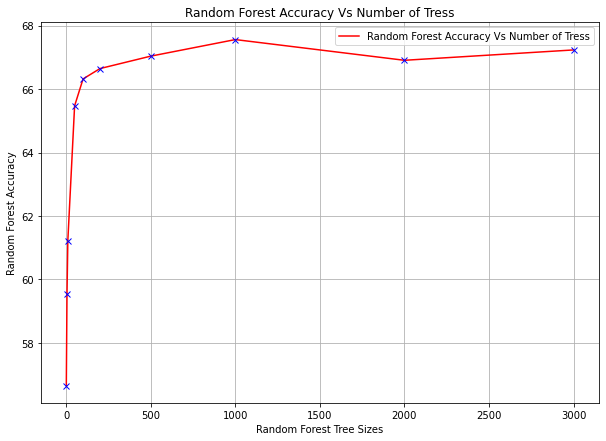

In [72]:
#### Cross validation For Random Forest

nns = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=500,
                                 random_state=0)
    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test))

    
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

In [73]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1, X1.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2, X2.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3, X3.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
    
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4, X4.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
    
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5, X5.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - Cluster 1::F-score - 5 Features
Accuracy - 63.860369609856264%
Recall - 0.6386036960985626
Random Forest - Cluster 1::F-score - 10 Features
Accuracy - 67.29979466119097%
Recall - 0.6729979466119097
Random Forest - Cluster 1::F-score - 20 Features
Accuracy - 70.7905544147844%
Recall - 0.7079055441478439
Random Forest - Cluster 1::F-score - 30 Features
Accuracy - 69.71252566735113%
Recall - 0.6971252566735113
Random Forest - Cluster 2::F-score - 5 Features
Accuracy - 61.161879895561356%
Recall - 0.6116187989556136
Random Forest - Cluster 2::F-score - 10 Features
Accuracy - 63.51174934725849%
Recall - 0.6351174934725848
Random Forest - Cluster 2::F-score - 20 Features
Accuracy - 65.53524804177546%
Recall - 0.6553524804177546
Random Forest - Cluster 2::F-score - 30 Features
Accuracy - 66.51436031331592%
Recall - 0.6651436031331592
Random Forest - Cluster 3::F-score - 5 Features
Accuracy - 52.79435702658709%
Recall - 0.5279435702658709
Random Forest - Cluster 3::F-score - 10

In [74]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

rfe_features_clus1 = [rfe_5_features_clus1, rfe_10_features_clus1, rfe_20_features_clus1, rfe_30_features_clus1]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
rfe_features_clus2 = [rfe_5_features_clus2, rfe_10_features_clus2, rfe_20_features_clus2, rfe_30_features_clus2]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus2[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
rfe_features_clus3 = [rfe_5_features_clus3, rfe_10_features_clus3, rfe_20_features_clus3, rfe_30_features_clus3]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus3[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
     
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
rfe_features_clus4 = [rfe_5_features_clus4, rfe_10_features_clus4, rfe_20_features_clus4, rfe_30_features_clus4]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus4[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
     
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
rfe_features_clus5 = [rfe_5_features_clus5, rfe_10_features_clus5, rfe_20_features_clus5, rfe_30_features_clus5]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus5[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - Cluster 1::RFE - 5 Features
Accuracy - 66.0164271047228%
Recall - 0.660164271047228
Random Forest - Cluster 1::RFE - 10 Features
Accuracy - 68.6858316221766%
Recall - 0.686858316221766
Random Forest - Cluster 1::RFE - 20 Features
Accuracy - 69.50718685831622%
Recall - 0.6950718685831622
Random Forest - Cluster 1::RFE - 30 Features
Accuracy - 70.63655030800821%
Recall - 0.7063655030800822
Random Forest - Cluster 2::RFE - 5 Features
Accuracy - 61.74934725848564%
Recall - 0.6174934725848564
Random Forest - Cluster 2::RFE - 10 Features
Accuracy - 64.62140992167102%
Recall - 0.6462140992167101
Random Forest - Cluster 2::RFE - 20 Features
Accuracy - 65.79634464751958%
Recall - 0.6579634464751958
Random Forest - Cluster 2::RFE - 30 Features
Accuracy - 66.77545691906005%
Recall - 0.6677545691906005
Random Forest - Cluster 3::RFE - 5 Features
Accuracy - 58.60010851871947%
Recall - 0.5860010851871947
Random Forest - Cluster 3::RFE - 10 Features
Accuracy - 62.28974498100922%
Recal

In [75]:
#### RFE
from sklearn.svm import SVC

In [76]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

rfe_features_clus1 = [rfe_5_features_clus1, rfe_10_features_clus1, rfe_20_features_clus1, rfe_30_features_clus1]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X1.columns.values) - set(rfe_features_clus1[i]))
    data_clus_rfe = X1.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = SVC(gamma='auto')

    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train) 

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
  
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
rfe_features_clus2 = [rfe_5_features_clus2, rfe_10_features_clus2, rfe_20_features_clus2, rfe_30_features_clus2]

for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X2.columns.values) - set(rfe_features_clus2[i]))
    data_clus_rfe = X2.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = SVC(gamma='auto')

    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train) 

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
  
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3.values)
rfe_features_clus3 = [rfe_5_features_clus3, rfe_10_features_clus3, rfe_20_features_clus3, rfe_30_features_clus3]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X3.columns.values) - set(rfe_features_clus3[i]))
    data_clus_rfe = X3.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = SVC(gamma='auto')

    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train) 

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
     
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4.values)
rfe_features_clus4 = [rfe_5_features_clus4, rfe_10_features_clus4, rfe_20_features_clus4, rfe_30_features_clus4]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X4.columns.values) - set(rfe_features_clus4[i]))
    data_clus_rfe = X4.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = SVC(gamma='auto')

    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train) 

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
     
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5.values)
rfe_features_clus5 = [rfe_5_features_clus5, rfe_10_features_clus5, rfe_20_features_clus5, rfe_30_features_clus5]

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    # the feautures are stored in the seconds column
    drop_these = list(set(X5.columns.values) - set(rfe_features_clus5[i]))
    data_clus_rfe = X5.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_rfe, encoded_labels, test_size=0.2, shuffle=False)

    clf = SVC(gamma='auto')

    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train) 

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::RFE - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Random Forest - Cluster 1::RFE - 5 Features
Accuracy - 69.96919917864476%
Random Forest - Cluster 1::RFE - 10 Features
Accuracy - 70.68788501026694%
Random Forest - Cluster 1::RFE - 20 Features
Accuracy - 70.37987679671458%
Random Forest - Cluster 1::RFE - 30 Features
Accuracy - 71.35523613963038%
Random Forest - Cluster 2::RFE - 5 Features
Accuracy - 63.64229765013055%
Random Forest - Cluster 2::RFE - 10 Features
Accuracy - 64.81723237597912%
Random Forest - Cluster 2::RFE - 20 Features
Accuracy - 66.18798955613578%
Random Forest - Cluster 2::RFE - 30 Features
Accuracy - 65.73107049608356%
Random Forest - Cluster 3::RFE - 5 Features
Accuracy - 60.824742268041234%
Random Forest - Cluster 3::RFE - 10 Features
Accuracy - 61.313076505697225%
Random Forest - Cluster 3::RFE - 20 Features
Accuracy - 60.49918610960391%
Random Forest - Cluster 3::RFE - 30 Features
Accuracy - 61.80141074335322%
Random Forest - Cluster 4::RFE - 5 Features
Accuracy - 64.83011937557393%
Random Forest - Cluster 4::

In [77]:
# Classification of the Data Channel an article was presented 

In [78]:
data_weekdays = copy(data.iloc[:, :-1])
data_weekdays

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.000000,0.0,0.017077,-0.829843,...,0.000000,-0.250,-0.667998,-0.248889,-1.333333,0.750000,-1.375000,-1.500000,0.750000,6.385194
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.000000,0.0,0.639381,-1.380182,...,-1.333333,-0.250,1.006307,0.933333,0.000000,-0.250000,0.000000,0.000000,0.000000,6.566672
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.000000,0.0,-0.792272,-0.380182,...,0.000000,0.500,-1.512693,-0.746667,-0.444444,-0.250000,0.000000,0.000000,0.000000,7.313220
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.000000,0.0,-0.758746,0.000000,...,0.727273,0.000,-0.810609,-0.248889,-0.888889,-0.250000,0.000000,0.000000,0.000000,7.090077
4,0.911994,0.898597,-1.082464,-1.386651,1.222222,5.333333,6.333333,0.0,0.023826,0.000000,...,-1.333333,0.500,0.271841,0.000000,0.666667,0.659091,1.000000,-1.363636,0.545455,6.224558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,0.331304,-0.194168,-0.105268,-0.072307,0.111111,1.333333,0.000000,1.0,-0.420000,0.329329,...,0.000000,-0.125,-0.016377,0.000000,-0.333333,-0.050000,0.000000,-0.300000,0.000000,7.495542
38458,0.633761,-0.245794,1.007356,1.357180,0.111111,1.333333,0.666667,48.0,-0.757029,0.000000,...,0.727273,-0.250,0.337591,0.248889,0.000000,0.350000,7.333333,-0.900000,4.000000,7.549609
38459,0.000000,0.042458,-0.203662,-0.413331,1.777778,-0.666667,3.666667,1.0,1.057262,0.329329,...,0.727273,-0.750,-0.714621,-0.746667,-0.888889,0.659091,1.000000,-1.363636,0.545455,7.549609
38460,-1.775660,0.461574,-0.026106,-0.008572,0.222222,-0.666667,0.000000,0.0,0.798073,-0.829843,...,-0.750000,-0.750,0.380059,0.000000,1.166667,-0.250000,0.000000,0.000000,0.000000,7.003065


In [79]:
# combine the data_channels as one

# Merging the data channels as one single column
DataChannelMerge=data[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [80]:
# merge the the new data into the dataframe
data_weekdays.insert(loc=58, column='channels', value=DataChannel_arr)

# Now I drop the old data
data_weekdays.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world'], axis = 1, inplace=True)
print(data_weekdays.shape)
data_weekdays.head(n=4)

(38462, 53)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,channels
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.0,0.0,0.017077,-0.829843,...,-0.25,-0.667998,-0.248889,-1.333333,0.75,-1.375,-1.5,0.75,6.385194,Entertainment
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.0,0.0,0.639381,-1.380182,...,-0.25,1.006307,0.933333,0.000000,-0.25,0.000,0.0,0.00,6.566672,Business
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.0,0.0,-0.792272,-0.380182,...,0.50,-1.512693,-0.746667,-0.444444,-0.25,0.000,0.0,0.00,7.313220,Business
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.0,0.0,-0.758746,0.000000,...,0.00,-0.810609,-0.248889,-0.888889,-0.25,0.000,0.0,0.00,7.090077,Entertainment


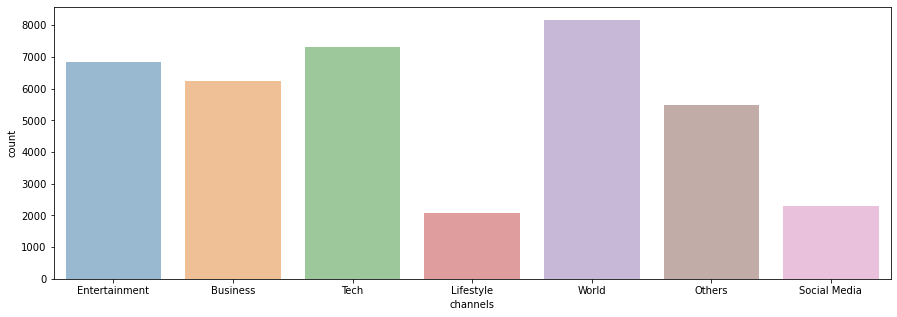

In [81]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='channels',data=data_weekdays,alpha=0.5)

In [82]:
# Fetch the counts for each class
class_counts = data_weekdays.groupby('channels').size().reset_index()
class_counts.columns = ['channels','No of articles']
class_counts

,channels,No of articles
0,Business,6235
1,Entertainment,6855
2,Lifestyle,2077
3,Others,5491
4,Social Media,2311
5,Tech,7325
6,World,8168


In [83]:
# transform the data

encoded_labels = labelEn.fit_transform(data_weekdays.loc[:, 'channels'].values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

# the feautures are stored in the seconds column
X_train, X_test, y_train, y_test = train_test_split(data_weekdays.iloc[:, :-1], encoded_labels, test_size=0.2, shuffle=False)

clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                             random_state=0)

clf.fit(X_train, y_train)  

# predict the result
y_pred = clf.predict(X_test)
print ("Random Forest - ::Full - ")
print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

Random Forest - ::Full - 
Accuracy - 82.17860392564668%
Recall - 0.8217860392564669


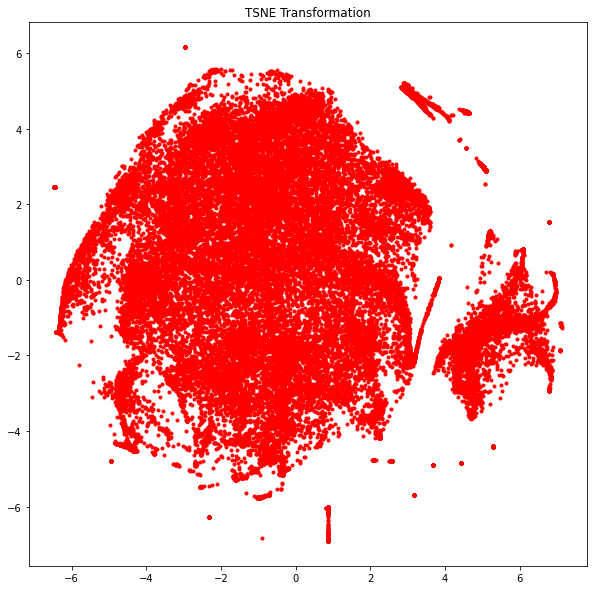

In [84]:
tsne = TSNE(n_components=2, n_iter=300)
reduced_tsne = tsne.fit_transform(data_weekdays.iloc[:,:-1])

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'r.')
plt.title('TSNE Transformation')
plt.show()

In [85]:
# Predicts the clusters
kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

In [86]:
# fussing the cluster data into the dataframe
data_weekdays2=pd.concat([data_weekdays.reset_index(drop=True), pd.DataFrame(kmeans_preds, columns=['clusters'])],axis=1)

In [87]:
# extrating individual cluster from the data
cluster1_data_weekdays = data_weekdays2[data_weekdays2['clusters'] == 0]
cluster2_data_weekdays = data_weekdays2[data_weekdays2['clusters'] == 1]
cluster3_data_weekdays = data_weekdays2[data_weekdays2['clusters'] == 2]
cluster4_data_weekdays = data_weekdays2[data_weekdays2['clusters'] == 3]
cluster5_data_weekdays = data_weekdays2[data_weekdays2['clusters'] == 4]
print ('Cluster1 size: ',cluster1_data_weekdays.shape)
print ('Cluster2 size: ',cluster2_data_weekdays.shape)
print ('Cluster3 size: ',cluster3_data_weekdays.shape)
print ('Cluster4 size: ',cluster4_data_weekdays.shape)
print ('Cluster5 size: ',cluster5_data_weekdays.shape)

Cluster1 size:  (8661, 54)
Cluster2 size:  (10214, 54)
Cluster3 size:  (7590, 54)
Cluster4 size:  (4726, 54)
Cluster5 size:  (7271, 54)


In [88]:
### F- score

# mututal information for cluster 3
X1_week = cluster1_data_weekdays.iloc[:, :-2]
y1_week = cluster1_data_weekdays.iloc[:, -2]

# mututal information for cluster 3
X2_week = cluster2_data_weekdays.iloc[:, :-2]
y2_week = cluster2_data_weekdays.iloc[:, -2]

# mututal information for cluster 3
X3_week = cluster3_data_weekdays.iloc[:, :-2]
y3_week = cluster3_data_weekdays.iloc[:, -2]

# mututal information for cluster 3
X4_week = cluster4_data_weekdays.iloc[:, :-2]
y4_week = cluster4_data_weekdays.iloc[:, -2]

# mututal information for cluster 3
X5_week = cluster5_data_weekdays.iloc[:, :-2]
y5_week = cluster5_data_weekdays.iloc[:, -2]



# F-Score for cluster 1
f_test_data = f_classif(X1_week, y1_week)
f_score_1_wk=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X2_week, y2_week)
f_score_2_wk=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X3_week, y3_week)
f_score_3_wk=f_test_data[0]

# F-Score for cluster 4
f_test_data = f_classif(X4_week, y4_week)
f_score_4_wk=f_test_data[0]

# F-Score for cluster 5
f_test_data = f_classif(X5_week, y5_week)
f_score_5_wk=f_test_data[0]

In [89]:
# For Cluster 1
encoded_labels = labelEn.fit_transform(y1_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1_wk, X1_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 1::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2_wk, X2_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 2::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3_wk, X3_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 3::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4_wk, X4_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 4::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))
  
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5_wk, X5_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    neigh = KNeighborsClassifier(n_neighbors=63, n_jobs=-1)

    neigh.fit(X_train, y_train)  

    # predict the result
    y_pred = neigh.predict(X_test)
    print ("KNN - Cluster 5::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='micro')))

KNN - Cluster 1::F-score - 5 Features
Accuracy - 71.66762839007501%
Recall - 0.7166762839007501
KNN - Cluster 1::F-score - 10 Features
Accuracy - 72.53317945758799%
Recall - 0.7253317945758799
KNN - Cluster 1::F-score - 20 Features
Accuracy - 67.85920369301789%
Recall - 0.6785920369301789
KNN - Cluster 1::F-score - 30 Features
Accuracy - 65.03173687247548%
Recall - 0.6503173687247548
KNN - Cluster 2::F-score - 5 Features
Accuracy - 79.93147332354381%
Recall - 0.7993147332354381
KNN - Cluster 2::F-score - 10 Features
Accuracy - 83.99412628487518%
Recall - 0.8399412628487518
KNN - Cluster 2::F-score - 20 Features
Accuracy - 82.91727851199217%
Recall - 0.8291727851199217
KNN - Cluster 2::F-score - 30 Features
Accuracy - 78.90357317670093%
Recall - 0.7890357317670093
KNN - Cluster 3::F-score - 5 Features
Accuracy - 71.93675889328063%
Recall - 0.7193675889328063
KNN - Cluster 3::F-score - 10 Features
Accuracy - 71.14624505928853%
Recall - 0.7114624505928854
KNN - Cluster 3::F-score - 20 Fea

In [90]:
### Random forest

# For Cluster 1
encoded_labels = labelEn.fit_transform(y1_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
n_features = [5, 10, 20, 30]

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_1_wk, X1_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X1_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X1_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 1::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='weighted')))
      
# For Cluster 2
encoded_labels = labelEn.fit_transform(y2_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']

for i in range(len(features_list)):
    best_features = extract_best_features(f_score_2_wk, X2_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X2_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X2_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 2::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='weighted')))
      
# For Cluster 3
encoded_labels = labelEn.fit_transform(y3_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_3_wk, X3_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X3_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X3_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 3::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='weighted')))
  
    
# For Cluster 4
encoded_labels = labelEn.fit_transform(y4_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_4_wk, X4_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X4_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X4_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 4::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='weighted')))
  
    
# For Cluster 5
encoded_labels = labelEn.fit_transform(y5_week.values)

features_list = ['5 Features', '10 Features', '20 Features', '30 Features']
for i in range(len(features_list)):
    best_features = extract_best_features(f_score_5_wk, X5_week.columns.values, n=n_features[i])
    # the feautures are stored in the seconds column
    drop_these = list(set(X5_week.columns.values) - set(best_features[:,1]))
    data_clus_mi = X5_week.drop(drop_these, axis=1, inplace=False)
    X_train, X_test, y_train, y_test = train_test_split(data_clus_mi, encoded_labels, test_size=0.2, shuffle=False)

    clf = RandomForestClassifier(n_estimators=500, n_jobs=5, max_depth=50,
                                 random_state=0)

    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    print ("Random Forest - Cluster 5::F-score - " + str(features_list[i]))
    print ("Accuracy - " + str(100*accuracy_score(y_pred, y_test)) + "%")
    print ("Recall - " + str(recall_score(y_test, y_pred, average='weighted')))

Random Forest - Cluster 1::F-score - 5 Features
Accuracy - 77.49567224466244%
Recall - 0.7749567224466244
Random Forest - Cluster 1::F-score - 10 Features
Accuracy - 78.82285054818234%
Recall - 0.7882285054818234
Random Forest - Cluster 1::F-score - 20 Features
Accuracy - 78.24581650317369%
Recall - 0.7824581650317368
Random Forest - Cluster 1::F-score - 30 Features
Accuracy - 77.95729948066936%
Recall - 0.7795729948066936
Random Forest - Cluster 2::F-score - 5 Features
Accuracy - 83.21096426823298%
Recall - 0.8321096426823299
Random Forest - Cluster 2::F-score - 10 Features
Accuracy - 85.70729319627998%
Recall - 0.8570729319627998
Random Forest - Cluster 2::F-score - 20 Features
Accuracy - 85.70729319627998%
Recall - 0.8570729319627998
Random Forest - Cluster 2::F-score - 30 Features
Accuracy - 85.56045031815957%
Recall - 0.8556045031815956
Random Forest - Cluster 3::F-score - 5 Features
Accuracy - 76.02108036890645%
Recall - 0.7602108036890646
Random Forest - Cluster 3::F-score - 10 